# Exploratory Data Analysis

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df['PID'].isnull()

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
Name: PID, dtype: bool

In [5]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [9]:
missing_values = ['n/a', 'na', '--']
missing_values

['n/a', 'na', '--']

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Unexpected Missing Values

In [35]:
cnt = 0

for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,OCCUPIED
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0,NaN
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,NaN
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,NaN
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,NaN
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,NaN
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,NaN


## Summarise missing value

In [36]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [39]:
df.isnull().sum().sum()

12

In [38]:
df.isnull().values.any()

True

In [41]:
df['ST_NUM'].fillna(25, inplace = True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,25.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,25.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [42]:
df.loc[2,'ST_NUM'] = 125
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,25.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [43]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,25.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [2]:
import xlrd

ModuleNotFoundError: No module named 'xlrd'

In [11]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')
data

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [4]:
data.sheet_names

NameError: name 'data' is not defined

In [3]:
data_age = data.parse(u'7.2', skiprow=4, skipfooter=14)
data_age

NameError: name 'data' is not defined

In [48]:
data_age.rename(columns={'unnamed: 0':'Year'}, inplace = True)
data_age.head(1)

NameError: name 'data_age' is not defined

In [50]:
data_age.dropna()

NameError: name 'data_age' is not defined

In [10]:
data_age.set_index('Year', inplace=True)
data_age.plot()

NameError: name 'data_age' is not defined

## Time Series

In [4]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [5]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col = 0, parse_dates = True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [6]:
opsd_daily['month'] = opsd_daily.index.month
opsd_daily['weekday'] = opsd_daily.index.weekday
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,1,3
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,12,4


In [8]:
opsd_daily.index[0]

Timestamp('2006-01-01 00:00:00')

In [9]:
opsd_daily.loc['2006-01-05':'2006-01-10']

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-05,1477.131,NaN,NaN,NaN,1,3
2006-01-06,1403.427,NaN,NaN,NaN,1,4
2006-01-07,1300.287,NaN,NaN,NaN,1,5
2006-01-08,1207.985,NaN,NaN,NaN,1,6
2006-01-09,1529.323,NaN,NaN,NaN,1,0
2006-01-10,1576.911,NaN,NaN,NaN,1,1


In [10]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2,3


<Axes: xlabel='Date'>

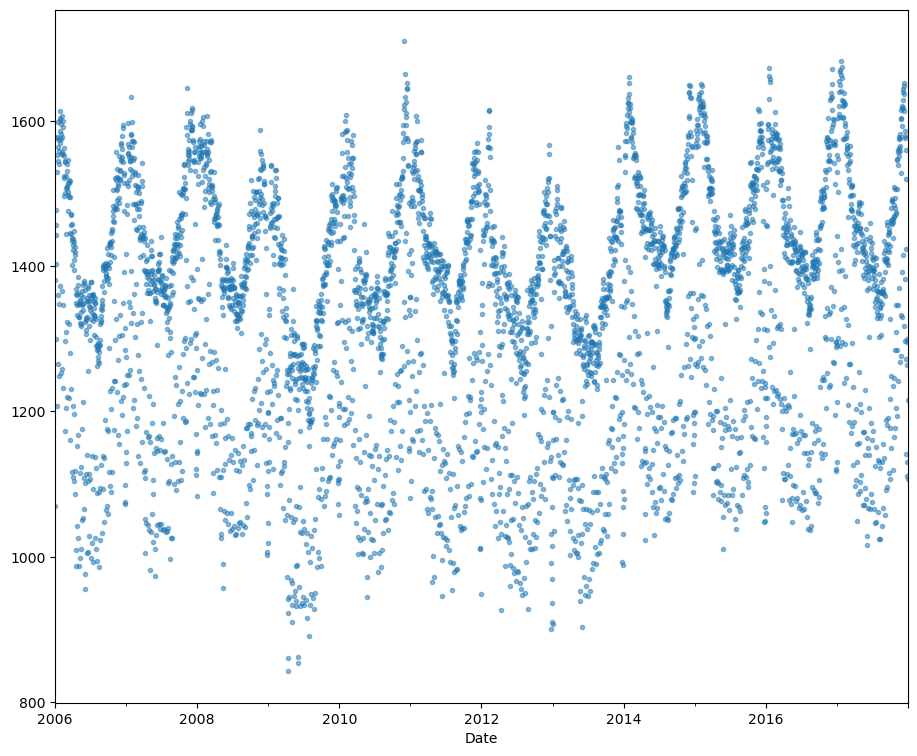

In [16]:
opsd_daily['Consumption'].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize =(11,9))

<Axes: xlabel='Date'>

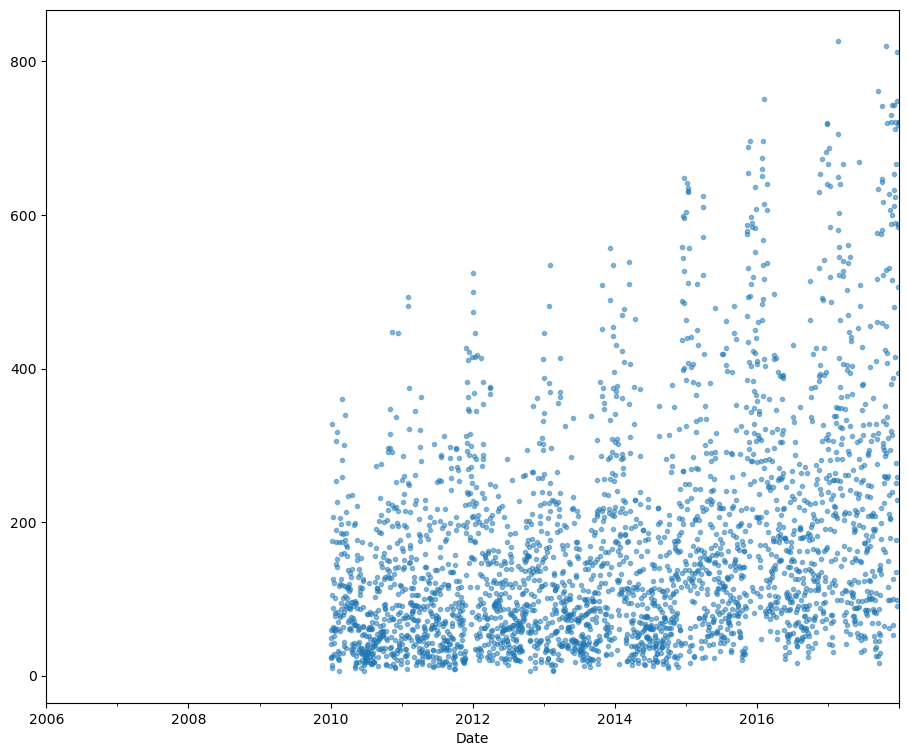

In [17]:
opsd_daily['Wind'].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize =(11,9))

Text(0, 0.5, 'Daily Consumption (GWh)')

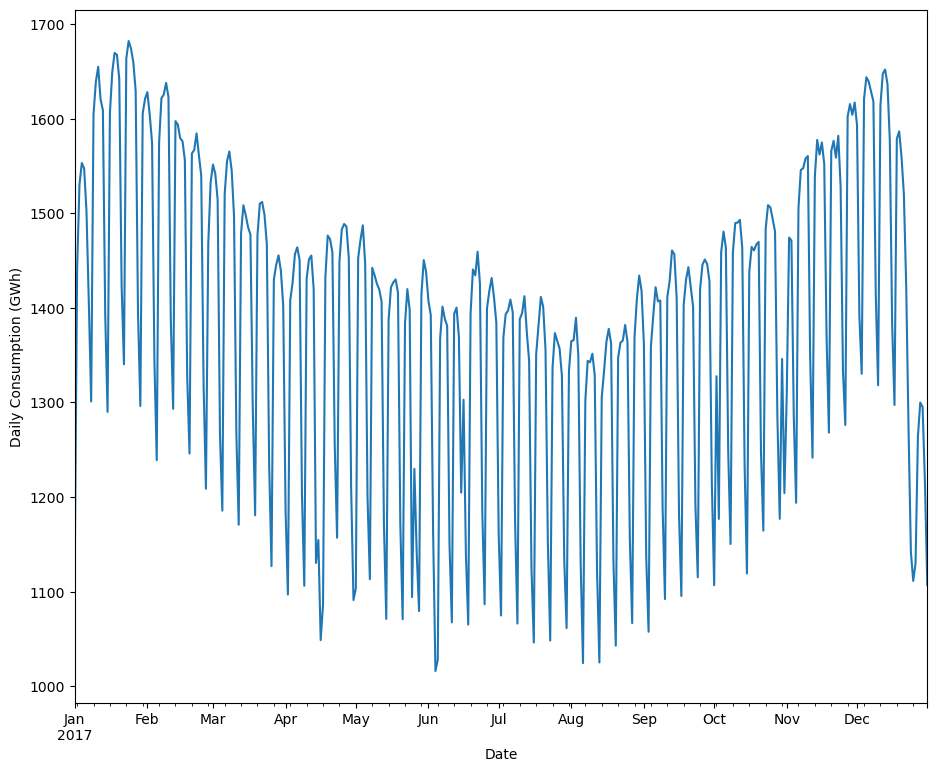

In [23]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

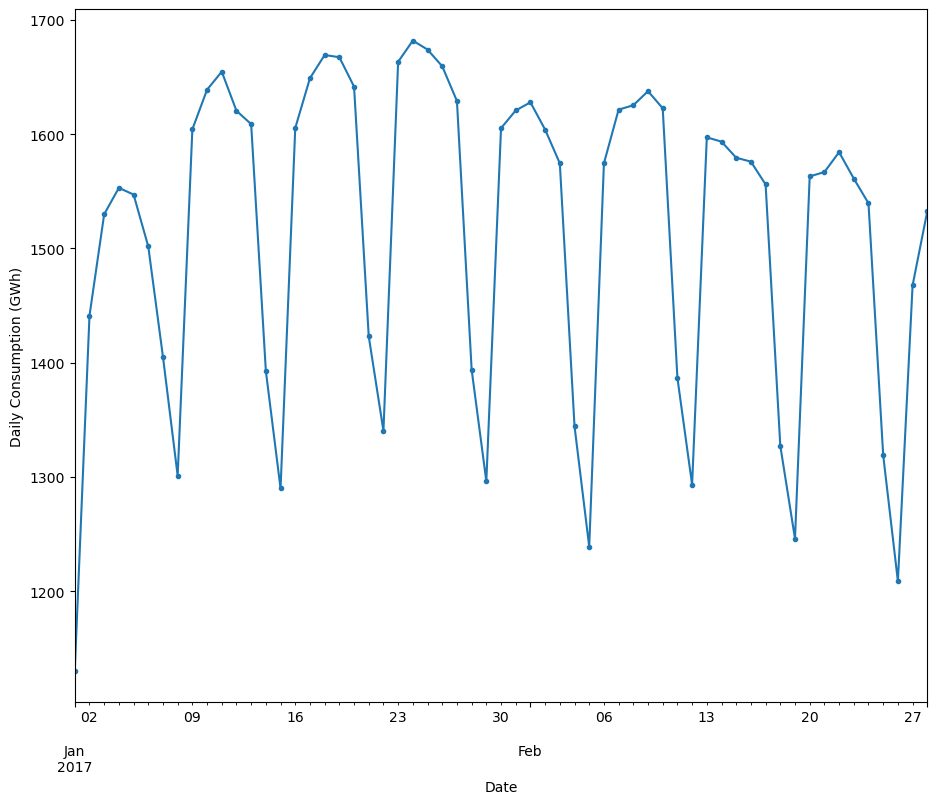

In [25]:
ax = opsd_daily.loc['2017-01': '2017-02', 'Consumption'].plot(figsize=(11,9), marker='.')
ax.set_ylabel('Daily Consumption (GWh)')

<Axes: >

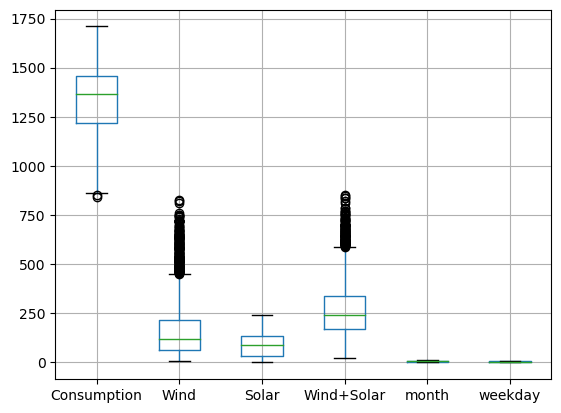

In [35]:
opsd_daily.boxplot()

In [33]:
opsd_daily.boxplot(column = ['Consumption'], by=['Month']);

KeyError: 'Month'

<Axes: >

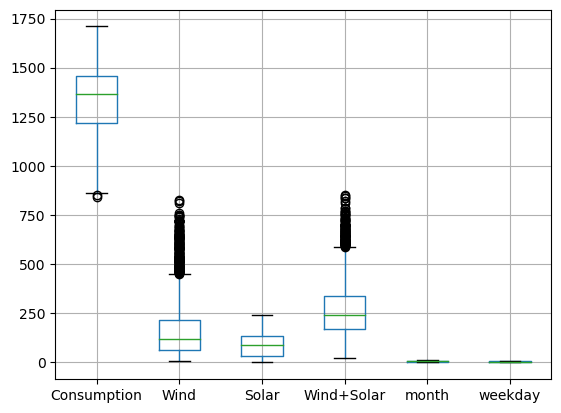

In [29]:
opsd_daily.boxplot()

In [34]:
opsd_daily.boxplot(column = ['Consumption', by=['Weekday']]);

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (835309153.py, line 1)

In [39]:
opsd_daily.boxplot(column = ['Consumption'], by=['Weekday']);

KeyError: 'Weekday'

In [40]:
opsd_daily.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'month', 'weekday'], dtype='object')

In [ ]:
data_column = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
